In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/uniwork

/content/drive/MyDrive/uniwork


In [ ]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
df.drop(df.columns[[0, 7, 16, 17, 18, 19, 24, 25]], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788767 entries, 0 to 788766
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date Rptd     788767 non-null  object 
 1   DATE OCC      788767 non-null  object 
 2   TIME OCC      788767 non-null  int64  
 3   AREA          788767 non-null  int64  
 4   AREA NAME     788767 non-null  object 
 5   Rpt Dist No   788767 non-null  int64  
 6   Crm Cd        788767 non-null  int64  
 7   Crm Cd Desc   788767 non-null  object 
 8   Mocodes       680162 non-null  object 
 9   Vict Age      788767 non-null  int64  
 10  Vict Sex      685415 non-null  object 
 11  Vict Descent  685407 non-null  object 
 12  Premis Cd     788758 non-null  float64
 13  Premis Desc   788300 non-null  object 
 14  Crm Cd 1      788757 non-null  float64
 15  Crm Cd 2      58171 non-null   float64
 16  Crm Cd 3      1936 non-null    float64
 17  Crm Cd 4      57 non-null      float64
 18  LAT 

In [ ]:
df['DATE OCC'] = df['DATE OCC'].str.extract(r'(\d{2}/\d{2}/\d{4})')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y')
df['Day'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month_name()
df['Year'] = df['DATE OCC'].dt.year

from datetime import time


def convert_to_time(value):
    hours = value // 100
    minutes = value % 100
    return time(hours, minutes)


df['TIME OCC'] = df['TIME OCC'].apply(convert_to_time)

df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df = df[['Day',
       'Month', 'Year', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']]

df = df[df['Year'] > 2022]

In [ ]:
df

,Day,Month,Year,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
225036,Saturday,February,2023,18:00:00,16,Foothill,1691,510,VEHICLE - STOLEN,NaN,...,NaN,NaN,101.0,STREET,510.0,NaN,NaN,NaN,34.2157,-118.3965
337691,Thursday,June,2023,10:50:00,15,N Hollywood,1549,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344,...,M,O,202.0,LIQUOR STORE,442.0,NaN,NaN,NaN,34.1722,-118.3750
408556,Friday,January,2023,17:30:00,20,Olympic,2027,510,VEHICLE - STOLEN,NaN,...,NaN,NaN,108.0,PARKING LOT,510.0,NaN,NaN,NaN,34.0636,-118.2954
408584,Saturday,May,2023,00:05:00,8,West LA,805,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,NaN,101.0,STREET,420.0,NaN,NaN,NaN,34.0885,-118.4748
408613,Tuesday,April,2023,19:00:00,3,Southwest,357,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,NaN,101.0,STREET,420.0,NaN,NaN,NaN,34.0231,-118.2933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788762,Thursday,January,2023,18:00:00,16,Foothill,1663,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,...,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",740.0,NaN,NaN,NaN,34.2466,-118.4054
788763,Wednesday,March,2023,10:00:00,16,Foothill,1602,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,...,F,H,102.0,SIDEWALK,230.0,NaN,NaN,NaN,34.2790,-118.4116
788764,Wednesday,April,2023,16:30:00,12,77th Street,1239,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,...,M,B,222.0,LAUNDROMAT,230.0,NaN,NaN,NaN,33.9841,-118.2915
788765,Saturday,July,2023,00:01:00,1,Central,154,352,PICKPOCKET,1822 0344,...,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),352.0,NaN,NaN,NaN,34.0467,-118.2485


In [ ]:
df = df[df['Month'] == 'February']

In [ ]:
df

,Day,Month,Year,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
225036,Saturday,February,2023,18:00:00,16,Foothill,1691,510,VEHICLE - STOLEN,NaN,...,NaN,NaN,101.0,STREET,510.0,NaN,NaN,NaN,34.2157,-118.3965
409395,Friday,February,2023,12:00:00,12,77th Street,1203,354,THEFT OF IDENTITY,NaN,...,F,W,501.0,SINGLE FAMILY DWELLING,354.0,NaN,NaN,NaN,34.0037,-118.3149
410423,Wednesday,February,2023,12:20:00,9,Van Nuys,904,330,BURGLARY FROM VEHICLE,0344 1822,...,F,X,101.0,STREET,330.0,NaN,NaN,NaN,34.2085,-118.4643
412113,Sunday,February,2023,13:50:00,10,West Valley,1008,888,TRESPASSING,1822,...,M,W,108.0,PARKING LOT,888.0,NaN,NaN,NaN,34.2179,-118.4854
413530,Wednesday,February,2023,23:15:00,14,Pacific,1412,480,BIKE - STOLEN,0344,...,F,W,121.0,YARD (RESIDENTIAL/BUSINESS),480.0,NaN,NaN,NaN,33.9957,-118.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788729,Wednesday,February,2023,22:00:00,13,Newton,1317,330,BURGLARY FROM VEHICLE,1307 0344 1822,...,M,H,101.0,STREET,330.0,NaN,NaN,NaN,34.0233,-118.2424
788730,Tuesday,February,2023,17:00:00,20,Olympic,2014,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0385 1300 1602 1822,...,F,K,101.0,STREET,331.0,NaN,NaN,NaN,34.0690,-118.3041
788736,Thursday,February,2023,10:30:00,20,Olympic,2024,761,BRANDISH WEAPON,1822 0334,...,M,H,108.0,PARKING LOT,761.0,NaN,NaN,NaN,34.0636,-118.3047
788751,Thursday,February,2023,18:30:00,4,Hollenbeck,428,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 1243 1241 0913 0400 0408 1814,...,F,H,504.0,OTHER RESIDENCE,236.0,NaN,NaN,NaN,34.0808,-118.1738


In [ ]:
values1 = {'Crm Cd 2': 0, 'Crm Cd 3': 0, 'Crm Cd 4': 0}
clean_df = df.fillna(value = values1)
clean_df.head(10)

clean_df.dropna(subset = ['Crm Cd 1', 'Mocodes'], inplace = True)
clean_df

values2 = {'Vict Sex': 'X', 'Vict Descent': 'X'}
clean_df2 = clean_df.fillna(value = values2)
clean_df2.replace(['H'], 'X', inplace = True)
clean_df2

clean_df2.dropna(subset = ['Premis Cd', 'Premis Desc'], inplace = True)
clean_df2

,Day,Month,Year,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
410423,Wednesday,February,2023,12:20:00,9,Van Nuys,904,330,BURGLARY FROM VEHICLE,0344 1822,...,F,X,101.0,STREET,330.0,0.0,0.0,0.0,34.2085,-118.4643
412113,Sunday,February,2023,13:50:00,10,West Valley,1008,888,TRESPASSING,1822,...,M,W,108.0,PARKING LOT,888.0,0.0,0.0,0.0,34.2179,-118.4854
413530,Wednesday,February,2023,23:15:00,14,Pacific,1412,480,BIKE - STOLEN,0344,...,F,W,121.0,YARD (RESIDENTIAL/BUSINESS),480.0,0.0,0.0,0.0,33.9957,-118.4786
414116,Wednesday,February,2023,09:45:00,4,Hollenbeck,477,850,INDECENT EXPOSURE,0529,...,F,X,203.0,OTHER BUSINESS,850.0,0.0,0.0,0.0,34.0336,-118.2140
416723,Monday,February,2023,09:00:00,13,Newton,1313,946,OTHER MISCELLANEOUS CRIME,1501,...,X,X,101.0,STREET,946.0,0.0,0.0,0.0,34.0290,-118.2480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788729,Wednesday,February,2023,22:00:00,13,Newton,1317,330,BURGLARY FROM VEHICLE,1307 0344 1822,...,M,X,101.0,STREET,330.0,0.0,0.0,0.0,34.0233,-118.2424
788730,Tuesday,February,2023,17:00:00,20,Olympic,2014,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0385 1300 1602 1822,...,F,K,101.0,STREET,331.0,0.0,0.0,0.0,34.0690,-118.3041
788736,Thursday,February,2023,10:30:00,20,Olympic,2024,761,BRANDISH WEAPON,1822 0334,...,M,X,108.0,PARKING LOT,761.0,0.0,0.0,0.0,34.0636,-118.3047
788751,Thursday,February,2023,18:30:00,4,Hollenbeck,428,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 1243 1241 0913 0400 0408 1814,...,F,X,504.0,OTHER RESIDENCE,236.0,0.0,0.0,0.0,34.0808,-118.1738


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

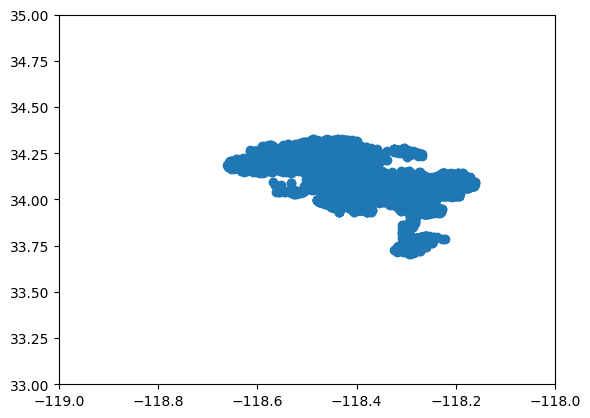

In [ ]:
lat_long = clean_df2[['LAT', 'LON']]
lat, longg = clean_df2['LAT'], clean_df2['LON']

plt.xlim(-119, -118)
plt.ylim(33, 35)
plt.scatter(longg, lat)

In [ ]:
from sklearn.cluster import DBSCAN

X = lat_long.to_numpy()
X.shape

(15775, 2)

In [ ]:
dbscan_cluster_model = DBSCAN(eps=0.01, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.01, min_samples=15)

In [ ]:
clean_df2['cluster'] = dbscan_cluster_model.labels_

clean_df2

,Day,Month,Year,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,cluster
410423,Wednesday,February,2023,12:20:00,9,Van Nuys,904,330,BURGLARY FROM VEHICLE,0344 1822,...,X,101.0,STREET,330.0,0.0,0.0,0.0,34.2085,-118.4643,0
412113,Sunday,February,2023,13:50:00,10,West Valley,1008,888,TRESPASSING,1822,...,W,108.0,PARKING LOT,888.0,0.0,0.0,0.0,34.2179,-118.4854,0
413530,Wednesday,February,2023,23:15:00,14,Pacific,1412,480,BIKE - STOLEN,0344,...,W,121.0,YARD (RESIDENTIAL/BUSINESS),480.0,0.0,0.0,0.0,33.9957,-118.4786,1
414116,Wednesday,February,2023,09:45:00,4,Hollenbeck,477,850,INDECENT EXPOSURE,0529,...,X,203.0,OTHER BUSINESS,850.0,0.0,0.0,0.0,34.0336,-118.2140,1
416723,Monday,February,2023,09:00:00,13,Newton,1313,946,OTHER MISCELLANEOUS CRIME,1501,...,X,101.0,STREET,946.0,0.0,0.0,0.0,34.0290,-118.2480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788729,Wednesday,February,2023,22:00:00,13,Newton,1317,330,BURGLARY FROM VEHICLE,1307 0344 1822,...,X,101.0,STREET,330.0,0.0,0.0,0.0,34.0233,-118.2424,1
788730,Tuesday,February,2023,17:00:00,20,Olympic,2014,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0385 1300 1602 1822,...,K,101.0,STREET,331.0,0.0,0.0,0.0,34.0690,-118.3041,1
788736,Thursday,February,2023,10:30:00,20,Olympic,2024,761,BRANDISH WEAPON,1822 0334,...,X,108.0,PARKING LOT,761.0,0.0,0.0,0.0,34.0636,-118.3047,1
788751,Thursday,February,2023,18:30:00,4,Hollenbeck,428,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 1243 1241 0913 0400 0408 1814,...,X,504.0,OTHER RESIDENCE,236.0,0.0,0.0,0.0,34.0808,-118.1738,1


In [ ]:
clean_df2['cluster'].value_counts()

 1    10534
 0     4209
-1      297
 2      260
 5      250
 3       81
 6       79
 4       28
 7       22
 8       15
Name: cluster, dtype: int64

In [ ]:
import plotly.express as px

fig = px.scatter(x=longg, y=lat, color=clean_df2['cluster'])

fig.show()

Silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score as ss

ss(X, clean_df2['cluster'])

0.2277931342361696